<a href="https://colab.research.google.com/github/srita2003/ML_Practicals/blob/main/Bonus_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

In [3]:
df=pd.read_csv("Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].copy()

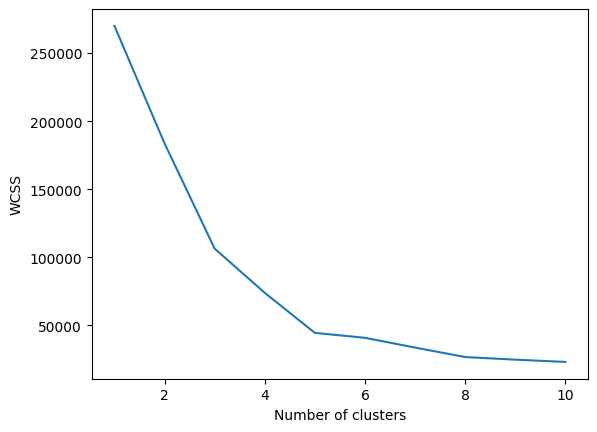

In [16]:
X = df.iloc[:, [3, 4]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans (n_clusters= i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

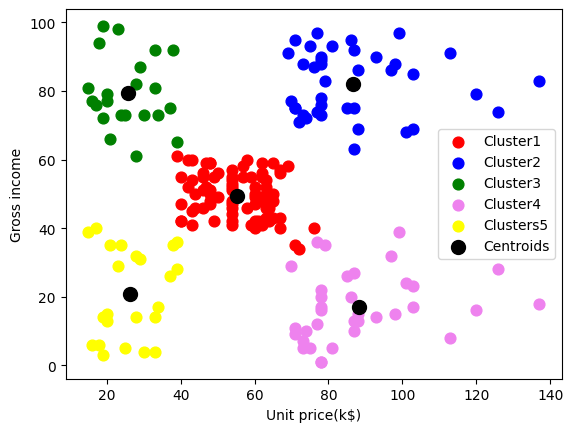

In [18]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans ==0, 1], s= 60, c = 'red', label ='Cluster1')
plt.scatter(X[y_kmeans== 1, 0], X[y_kmeans ==1, 1], s= 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans== 3, 0], X[y_kmeans== 3, 1],  s = 60,c= 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans== 4, 0], X[y_kmeans== 4, 1], s=60, c='yellow', label = 'Clusters5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s =100, c ='black', label= 'Centroids')
plt.xlabel('Unit price(k$)')
plt.ylabel('Gross income')
plt.legend()
plt.show()

In [20]:
# K-Means Silhouette Score
kmeans_silhouette = silhouette_score(X, y_kmeans)
print(f'K-Means Silhouette Score: {kmeans_silhouette:.3f}')

K-Means Silhouette Score: 0.554


In [22]:
# ------ DBSCAN Clustering ------

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

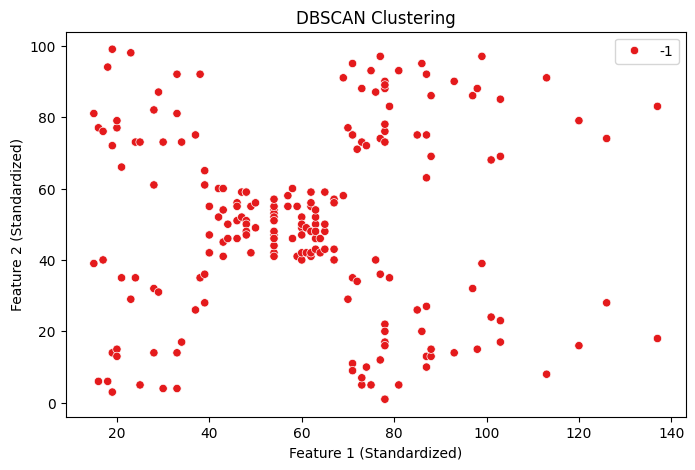

In [24]:
# Visualizing DBSCAN Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_dbscan, palette='Set1')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

In [32]:
# DBSCAN Silhouette Score (ignoring noise points)
dbscan_silhouette = -1  # Initialize with a default value
if len(set(y_dbscan)) > 1:  # Ensure there are clusters to evaluate
    dbscan_silhouette = silhouette_score(X[y_dbscan != -1], y_dbscan[y_dbscan != -1])
    print(f'DBSCAN Silhouette Score: {dbscan_silhouette:.3f}')
else:
    print('DBSCAN failed to form distinct clusters.')

DBSCAN failed to form distinct clusters.


In [33]:
# ------ Analysis & Recommendation ------
if kmeans_silhouette > dbscan_silhouette:
    print("K-Means performs better and is recommended for customer segmentation.")
else:
    print("DBSCAN is more suitable if the data has noise and clusters of varying densities.")


K-Means performs better and is recommended for customer segmentation.
